In [2]:
# 1. Importamos las herramientas necesarias
import pandas as pd  # Para manejar tablas de datos (como Excel)
import numpy as np   # Para cálculos matemáticos
import matplotlib.pyplot as plt # Para gráficos
import seaborn as sns # Para gráficos más bonitos

# 2. Cargamos el archivo de datos
# Usamos encoding='ISO-8859-1' porque este archivo tiene caracteres especiales
datos = pd.read_csv('dataset/top10s.csv', encoding='ISO-8859-1')

# 3. Mostramos las primeras 5 filas para ver qué pinta tiene
print("Primeras 5 canciones:")
display(datos.head())

# 4. Vemos qué columnas tenemos
print("\nInformación de las columnas:")
print(datos.info())

Primeras 5 canciones:


,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78



Información de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB
None


In [3]:
# Vamos a ver cuántos géneros únicos hay al principio
print("Cantidad de géneros originales:", len(datos['top genre'].unique()))

# Función para simplificar los géneros
def simplificar_genero(genero):
    genero = genero.lower()
    if 'pop' in genero:
        return 'Pop'
    elif 'hip hop' in genero or 'rap' in genero:
        return 'Hip Hop'
    elif 'electronic' in genero or 'dance' in genero or 'house' in genero:
        return 'Electronic/Dance'
    elif 'rock' in genero or 'metal' in genero:
        return 'Rock'
    elif 'latin' in genero or 'reggaeton' in genero:
        return 'Latin'
    else:
        return 'Otros'

# Aplicamos la función a la columna 'top genre'
datos['genero_simple'] = datos['top genre'].apply(simplificar_genero)

# Vemos cuántos quedan ahora
print("Cantidad de géneros simplificados:", len(datos['genero_simple'].unique()))
print(datos['genero_simple'].value_counts())

Cantidad de géneros originales: 50
Cantidad de géneros simplificados: 6
genero_simple
Pop                 485
Otros                84
Hip Hop              17
Electronic/Dance     11
Latin                 5
Rock                  1
Name: count, dtype: int64


In [5]:
from sklearn.model_selection import train_test_split

# 1. Separamos las PREGUNTAS (X) de las RESPUESTAS (y)
# X son las características (bpm, energia, bailabilidad...)
# Quitamos 'title', 'artist', 'top genre' (el viejo) y 'year' que no nos sirven para predecir por sonido.
columnas_a_quitar = ['title', 'artist', 'top genre', 'year', 'genero_simple', 'Unnamed: 0']
X = datos.drop(columns=columnas_a_quitar)

# y es lo que queremos predecir (el género simplificado)
y = datos['genero_simple']

# 2. Partimos los datos: 80% para entrenar, 20% para testear
# random_state=42 es un truco para que siempre salga la misma división si repites el código
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Datos para entrenar: {X_train.shape}")
print(f"Datos para examen: {X_test.shape}")

Datos para entrenar: (482, 10)
Datos para examen: (121, 10)


In [9]:
from sklearn.ensemble import RandomForestClassifier

# 1. Creamos el modelo (el cerebro vacío)
#modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# 2. ¡ENTRENAMIENTO! Le enseñamos los datos de estudio
modelo.fit(X_train, y_train)

print("¡Modelo entrenado exitosamente!")

¡Modelo entrenado exitosamente!


Precisión del modelo: 83.47%

Informe de Clasificación:
                  precision    recall  f1-score   support

Electronic/Dance       0.00      0.00      0.00         1
         Hip Hop       0.00      0.00      0.00         2
           Latin       0.00      0.00      0.00         1
           Otros       1.00      0.11      0.20        18
             Pop       0.83      1.00      0.91        99

        accuracy                           0.83       121
       macro avg       0.37      0.22      0.22       121
    weighted avg       0.83      0.83      0.77       121



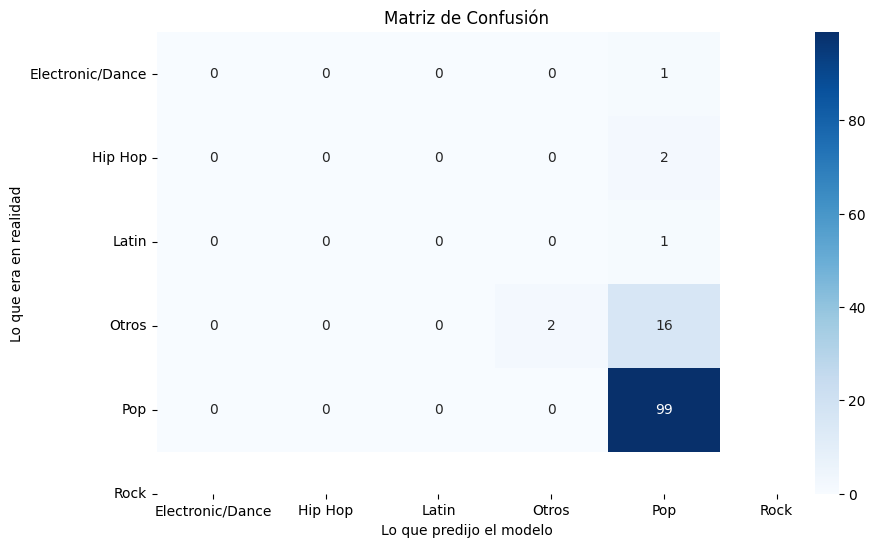

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Hacemos predicciones con los datos que el modelo NO ha visto nunca
predicciones = modelo.predict(X_test)

# 2. Calculamos la precisión (Accuracy)
precision = accuracy_score(y_test, predicciones)
print(f"Precisión del modelo: {precision * 100:.2f}%")

# 3. Informe detallado
print("\nInforme de Clasificación:")
#print(classification_report(y_test, predicciones))
print(classification_report(y_test, predicciones, zero_division=0))

# 4. Visualizamos los aciertos y fallos (Matriz de Confusión)
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt='d', cmap='Blues',
            xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.xlabel('Lo que predijo el modelo')
plt.ylabel('Lo que era en realidad')
plt.title('Matriz de Confusión')
plt.show()